# XGBoost Decision Tree Model

## 1. Data Loading

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("final.csv", index_col=[0])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindGustDir_N,WindGustDir_E,WindGustDir_S,WindGustDir_W,WindDir9am_N,WindDir9am_E,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_E,WindDir3pm_S,WindDir3pm_W,RainToday_Yes,RainTomorrow_Yes
0,2009-01-01,Albury,0.466981,0.591682,0.0,0.067586,0.931034,0.387597,0.146154,0.356322,0.46,0.26,0.396694,0.4176,0.111111,0.111111,0.567511,0.596929,1.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0,0
1,2009-01-02,Albury,0.426887,0.542533,0.0,0.102069,0.944828,0.271318,0.146154,0.126437,0.44,0.22,0.560331,0.5760,0.111111,0.000000,0.466245,0.527831,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,1.0,0,0
2,2009-01-03,Albury,0.448113,0.635161,0.0,0.067586,0.944828,0.155039,0.084615,0.080460,0.43,0.22,0.631405,0.6032,0.000000,0.111111,0.512658,0.612284,0.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,0,0
3,2009-01-04,Albury,0.490566,0.744802,0.0,0.064828,0.834483,0.240310,0.046154,0.195402,0.41,0.12,0.571901,0.5312,0.111111,0.444444,0.588608,0.754319,1.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,1.5,0.0,0.0,1.5,0,0
4,2009-01-05,Albury,0.504717,0.767486,0.0,0.080000,0.924138,0.271318,0.046154,0.298851,0.41,0.09,0.530579,0.5136,0.111111,0.111111,0.624473,0.763916,1.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.5,0.0,0.0,1.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143124,2017-06-21,Uluru,0.266509,0.533081,0.0,0.013793,0.627586,0.193798,0.100000,0.126437,0.51,0.24,0.728926,0.6912,0.111111,0.000000,0.364979,0.533589,0.0,3.0,0.0,0.0,0.0,1.5,1.5,0.0,1.0,2.0,0.0,0.0,0,0
143125,2017-06-22,Uluru,0.285377,0.568998,0.0,0.009655,0.600000,0.124031,0.100000,0.103448,0.56,0.21,0.710744,0.6720,0.888889,0.666667,0.381857,0.573896,2.0,0.0,0.0,1.0,0.0,1.5,1.5,0.0,3.0,0.0,0.0,0.0,0,0
143126,2017-06-23,Uluru,0.327830,0.599244,0.0,0.027586,0.406897,0.240310,0.069231,0.103448,0.53,0.24,0.669421,0.6352,0.777778,0.333333,0.415612,0.604607,3.0,0.0,0.0,0.0,0.0,1.5,1.5,0.0,1.0,0.0,0.0,2.0,0,0
143127,2017-06-24,Uluru,0.384434,0.601134,0.0,0.027586,0.441379,0.170543,0.100000,0.080460,0.51,0.24,0.642975,0.6304,0.333333,0.222222,0.470464,0.602687,0.0,1.5,1.5,0.0,0.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,0,0


In [3]:
features = list(df.columns)[2:31]
target = ["RainTomorrow_Yes"]

### Note: We tried clustering the entries into 4 groups and add that into the dataframe. However, this does not improve the model performance.

In [ ]:
# from sklearn.cluster import KMeans
# kmeansmodel = KMeans(n_clusters=4)
# df = df.drop(['Date'],axis=1)
# df = df.drop("Location",axis=1)
# kmeansmodel.fit(data_kmeans)

In [ ]:
# df["Cluster"]= kmeansmodel.labels_
# df.head()

## 2. Training & Testing Sets

In [4]:
location_list= [i for i in df["Location"].unique()]

In [5]:
data_training = pd.DataFrame()

for i in location_list:
    a = df[df['Location']==i]
    sample= a.sample(frac= 0.8)
    data_training = data_training.append(sample)

data_training.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindGustDir_N,WindGustDir_E,WindGustDir_S,WindGustDir_W,WindDir9am_N,WindDir9am_E,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_E,WindDir3pm_S,WindDir3pm_W,RainToday_Yes,RainTomorrow_Yes
2435,2015-11-30,Albury,0.436321,0.688091,0.000000,0.048276,0.758621,0.193798,0.053846,0.149425,0.61,0.21,0.519008,0.4928,0.000000,0.111111,0.531646,0.671785,0.0,0.0,0.0,3.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0,0,0
1743,2014-01-07,Albury,0.431604,0.610586,0.000000,0.089655,0.944828,0.271318,0.130769,0.149425,0.43,0.23,0.644628,0.6288,0.000000,0.000000,0.504219,0.587332,0.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,0.0,0,0
822,2011-05-03,Albury,0.412736,0.504726,0.000000,0.006897,0.544828,0.170543,0.000000,0.000000,0.74,0.46,0.596694,0.5984,0.555556,0.111111,0.459916,0.518234,0.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0,0
2812,2016-12-11,Albury,0.452830,0.654064,0.000000,0.051034,0.724138,0.193798,0.069231,0.172414,0.57,0.27,0.672727,0.6592,0.777778,0.888889,0.556962,0.637236,0.0,0.0,2.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0,0
905,2011-07-25,Albury,0.330189,0.340265,0.043666,0.005517,0.068966,0.155039,0.069231,0.126437,0.99,0.80,0.596694,0.6192,0.888889,0.777778,0.320675,0.337812,1.5,0.0,0.0,1.5,0.0,1.5,1.5,0.0,1.5,0.0,0.0,1.5,1,1


In [6]:
data_testing = df.copy() # first copy the original dataset 

X_merge = pd.merge(df, data_training, how='inner') #merges the two datasets of training and original

data_testing = data_testing.append(X_merge) #appends the original and training to the data_testing
data_testing['Duplicated']= data_testing.duplicated(keep=False) #hence marks all the duplocated rows with a True

data_testing_final = data_testing[~data_testing['Duplicated']] #selects rows which are not duplicated
del data_testing_final['Duplicated']

data_testing_final.head()   # data_testing= df - data_training

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindGustDir_N,WindGustDir_E,WindGustDir_S,WindGustDir_W,WindDir9am_N,WindDir9am_E,WindDir9am_S,WindDir9am_W,WindDir3pm_N,WindDir3pm_E,WindDir3pm_S,WindDir3pm_W,RainToday_Yes,RainTomorrow_Yes
3,2009-01-04,Albury,0.490566,0.744802,0.000000,0.064828,0.834483,0.240310,0.046154,0.195402,0.41,0.12,0.571901,0.5312,0.111111,0.444444,0.588608,0.754319,1.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,1.5,0.0,0.0,1.5,0,0
10,2009-01-11,Albury,0.599057,0.695652,0.000000,0.071724,0.696552,0.193798,0.100000,0.195402,0.52,0.31,0.485950,0.4752,0.111111,0.777778,0.632911,0.679463,0.0,0.0,3.0,0.0,0.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,0,0
16,2009-01-17,Albury,0.448113,0.627599,0.000000,0.103448,0.924138,0.209302,0.146154,0.126437,0.35,0.16,0.647934,0.6448,0.111111,0.111111,0.489451,0.598848,0.0,1.5,1.5,0.0,0.0,1.5,1.5,0.0,0.0,0.0,1.5,1.5,0,0
30,2009-01-31,Albury,0.719340,0.897921,0.000000,0.091034,0.917241,0.325581,0.030769,0.045977,0.33,0.11,0.557025,0.5344,0.222222,0.111111,0.782700,0.909789,0.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.5,1.5,0,0
32,2009-02-02,Albury,0.775943,0.814745,0.000539,0.126897,0.668966,0.387597,0.146154,0.080460,0.32,0.21,0.515702,0.4848,0.222222,0.777778,0.759494,0.815739,0.0,0.0,1.5,1.5,1.5,1.5,0.0,0.0,1.5,0.0,0.0,1.5,0,0


In [8]:
X_train= data_training[features]
y_train= data_training[target]

X_val= data_testing_final[features]
y_val= data_testing_final[target]

## 3. Majority Classifier Benchmarking

In [14]:
from sklearn.dummy import DummyClassifier

In [15]:
dummy_clf = DummyClassifier(strategy="most_frequent")   # i.e., majority classifier
dummy_clf.fit(X_train, y_train)
pred = dummy_clf.predict(X_val)

In [16]:
from sklearn import metrics

def metrics_report(pred):
    print("MAE:", metrics.mean_absolute_error(y_val, pred))
    print("Accuracy:", metrics.accuracy_score(y_val, pred, normalize=True, sample_weight=None))
    print("Classification Report:\n", metrics.classification_report(y_val, pred))
    print("Confusion Matrix:\n", metrics.confusion_matrix(y_val, pred))

metrics_report(pred)

MAE: 0.2263584299483168
Accuracy: 0.7736415700516832
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87     22154
           1       0.00      0.00      0.00      6482

    accuracy                           0.77     28636
   macro avg       0.39      0.50      0.44     28636
weighted avg       0.60      0.77      0.67     28636

Confusion Matrix:
 [[22154     0]
 [ 6482     0]]
E:\Programs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 4. XGBoost

In [9]:
import xgboost as xgb

In [10]:
train = xgb.DMatrix(X_train, label=y_train)

In [13]:
# Let's do a wild guess
params = {
    'eta': 0.3,     # Learning rate
    'max_depth': 1,
    'gamma': 0,
    'num_class': 2,  # Yes or No
    'objective': 'multi:softmax',
    'eval_metric': [(X_val, y_val)],
}

xgb_clf = xgb.XGBClassifier(**params, use_label_encoder=False, verbosity=0)

In [14]:
xgb_clf.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=[(X_val, y_val)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3,
              eval_metric=[(         MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
5       0.523585  0.807183  0.000000     0.089655  0.937931       0.356589   
20      0.655660  0.810964  0.002156     0.107586  0.848276       0.426357   
22      0.643868  0.756144  0.017251     0.070345  0.758621       0.356589   
39      0.634434  0.680529  0....
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_class=2, num_parallel_tree=1, objective='multi:softmax',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [15]:
predictions = xgb_clf.predict(X_val)
metrics_report(predictions)

MAE: 0.15372258695348512
Accuracy: 0.8462774130465148
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22147
           1       0.74      0.50      0.60      6489

    accuracy                           0.85     28636
   macro avg       0.80      0.72      0.75     28636
weighted avg       0.84      0.85      0.84     28636

Confusion Matrix:
 [[20973  1174]
 [ 3228  3261]]
E:\Programs\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


### Hyperparameter tuning

In [16]:
params = {
    'eta': 0.3,     # Learning rate
    'max_depth': 1,
    'gamma': 0,
    'num_class': 2,  # Yes or No
    'objective': 'multi:softmax',
    'eval_metric': [(X_val, y_val)],
}

In [17]:
gridsearch_params = [
    (eta, max_depth, gamma)
    for eta in [0.3, 0.5, 0.7, 0.9]
    for max_depth in [1, 2] 
    for gamma in [0, 0.05]
]

gridsearch_params

[(0.3, 1, 0),
 (0.3, 1, 0.05),
 (0.3, 2, 0),
 (0.3, 2, 0.05),
 (0.5, 1, 0),
 (0.5, 1, 0.05),
 (0.5, 2, 0),
 (0.5, 2, 0.05),
 (0.7, 1, 0),
 (0.7, 1, 0.05),
 (0.7, 2, 0),
 (0.7, 2, 0.05),
 (0.9, 1, 0),
 (0.9, 1, 0.05),
 (0.9, 2, 0),
 (0.9, 2, 0.05)]

In [18]:
%%time

mlogloss_mins = []
min_mlogloss_min = 99999
best_params = None

for eta, max_depth, gamma in gridsearch_params:
    print(f'CV with eta={eta}, max_depth={max_depth}, gamma={gamma}')

    # Update params
    params['eta'] = eta
    params['max_depth'] = max_depth
    params['gamma'] = gamma

    # Run CV
    cv_results = xgb.cv(params, train, seed=42, nfold=4, num_boost_round=400, early_stopping_rounds=10, metrics={"mlogloss"})

    min_mlogloss = cv_results['train-mlogloss-mean'].min()
    print(f'\tmlogloss = {min_mlogloss}')

    mlogloss_mins.append(min_mlogloss)
    if min_mlogloss < min_mlogloss_min:
        min_mlogloss_min = min_mlogloss
        best_params = (eta, max_depth, gamma)

CV with eta=0.3, max_depth=1, gamma=0
	mlogloss = 0.34090475
CV with eta=0.3, max_depth=1, gamma=0.05
	mlogloss = 0.34090475
CV with eta=0.3, max_depth=2, gamma=0
	mlogloss = 0.317961
CV with eta=0.3, max_depth=2, gamma=0.05
	mlogloss = 0.31796749999999996
CV with eta=0.5, max_depth=1, gamma=0
	mlogloss = 0.33964
CV with eta=0.5, max_depth=1, gamma=0.05
	mlogloss = 0.33964
CV with eta=0.5, max_depth=2, gamma=0
	mlogloss = 0.30991475
CV with eta=0.5, max_depth=2, gamma=0.05
	mlogloss = 0.30991475
CV with eta=0.7, max_depth=1, gamma=0
	mlogloss = 0.33849074999999995
CV with eta=0.7, max_depth=1, gamma=0.05
	mlogloss = 0.33849074999999995
CV with eta=0.7, max_depth=2, gamma=0
	mlogloss = 0.3159445
CV with eta=0.7, max_depth=2, gamma=0.05
	mlogloss = 0.3159445
CV with eta=0.9, max_depth=1, gamma=0
	mlogloss = 0.33762574999999995
CV with eta=0.9, max_depth=1, gamma=0.05
	mlogloss = 0.33762574999999995
CV with eta=0.9, max_depth=2, gamma=0
	mlogloss = 0.318031
CV with eta=0.9, max_depth=2, g

### Train Model with the Best Parameters

In [19]:
print(best_params)
# First item = eta
# Second item = max_depth
# Thrid item = gamma

(0.5, 2, 0)


In [11]:
best_params = {
    'eta': 0.5,     # Learning rate
    'max_depth': 2,
    'min_child_weight': 1,
    'gamma': 0,
    'num_class': 2,  # Yes or No
    'objective': 'multi:softmax',
    'eval_metric': [(X_val, y_val)],
}

In [17]:
# n_estimators = Number of boosting rounds
xgb_clf_best = xgb.XGBClassifier(**best_params, n_estimators=400, use_label_encoder=False, verbosity=0)

xgb_clf_best.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=[(X_val, y_val)], verbose=False)
predictions = xgb_clf_best.predict(X_val)
metrics_report(predictions)

MAE: 0.14754155608325184
Accuracy: 0.8524584439167482
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     22154
           1       0.74      0.54      0.62      6482

    accuracy                           0.85     28636
   macro avg       0.81      0.74      0.77     28636
weighted avg       0.84      0.85      0.84     28636

Confusion Matrix:
 [[20910  1244]
 [ 2981  3501]]
E:\Programs\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

In [19]:
predict_proba = xgb_clf_best.predict_proba(X_val)
print(roc_auc_score(y_val, predict_proba[:,1]))

0.8861641895973926
E:\Programs\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


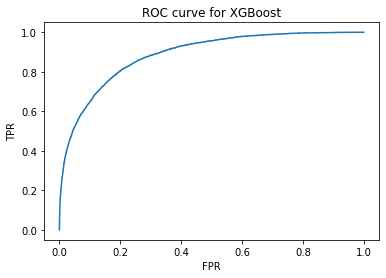

In [21]:
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_val, predict_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for XGBoost')
plt.show()